In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt


import tensorflow as tf 
from tensorflow import keras
from keras import layers

from tqdm.notebook import tqdm
import time as tm


# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
# tf.config.run_functions_eagerly(False)


MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rcdefaults()

# plt.rc('font',**{'family':'serif','serif':['Times']})
# plt.rc('text', usetex=True)

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title


%matplotlib inline

2025-04-09 11:21:34.241199: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-09 11:21:34.244805: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-09 11:21:34.256386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-09 11:21:34.274235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-09 11:21:34.279382: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-09 11:21:34.291876: I tensorflow/core/platform/cpu_feature_gu

In [2]:
rng = np.random.default_rng()

# fig,ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))

# ax.grid(True,linestyle=':',linewidth='1.')
# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')
# ax.tick_params('both',length=3,width=0.5,which='both',direction = 'in',pad=10)


# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')

### Sobol sequences

Text(0, 0.5, '$y$')

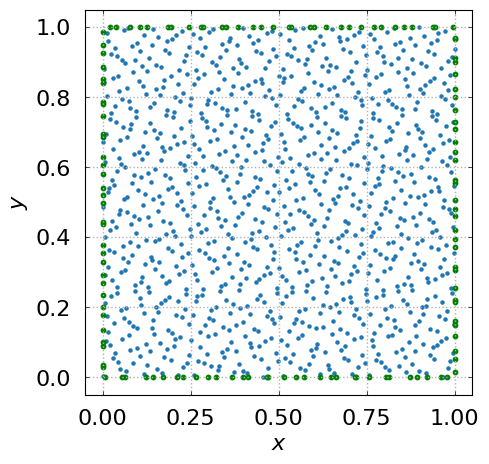

In [3]:
m = 5 # 2^m points in each dimension

sampler_bulk = scipy.stats.qmc.Sobol(d=2, scramble=True)
sampler_boundary = scipy.stats.qmc.Sobol(d=1, scramble=True)

samples_bulk = sampler_bulk.random_base2(m=2*m)
samples_boundary = sampler_boundary.random_base2(m=m+2)

arr1,arr2,arr3,arr4 = np.split(samples_boundary, indices_or_sections=4)

left_boundary = np.concatenate([np.full_like(arr1, 0.), arr1], axis=1)
right_boundary = np.concatenate([np.full_like(arr2, 1.), arr2], axis=1)
up_boundary = np.concatenate([arr3, np.full_like(arr3, 0.)], axis=1)
down_boundary = np.concatenate([arr4, np.full_like(arr4, 1.)], axis=1)


fig,ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))

ax.scatter(*samples_bulk.T, s=5)

for arr in [left_boundary,right_boundary,up_boundary,down_boundary]:
    ax.scatter(*arr.T, s=10, color='green')

ax.grid(True,linestyle=':',linewidth='1.')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.tick_params('both',length=3,width=0.5,which='both',direction = 'in',pad=10)


ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

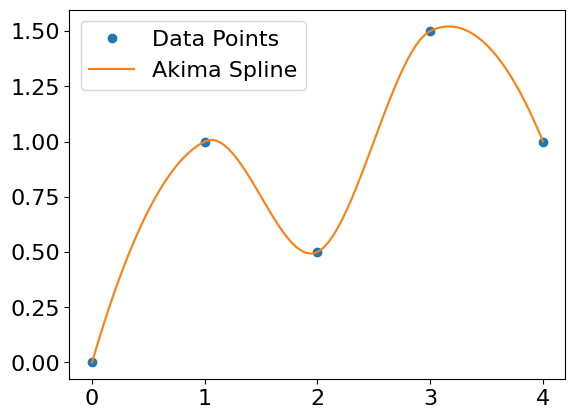

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Akima1DInterpolator

# Sample data
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 0.5, 1.5, 1])

# Create Akima spline
akima = Akima1DInterpolator(x, y)

# Interpolate at new points
x_new = np.linspace(0, 4, 100)
y_new = akima(x_new)

# Plot
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_new, y_new, '-', label='Akima Spline')
plt.legend()
plt.show()

In [5]:
Msun = 5e-6  # s

Mbh = 1e+9

AU = 500.
pc = 206000.

Mbh*Msun / AU / pc

4.854368932038835e-05

In [6]:
4.4*(1e+3/Mbh) / 10e-9 * (Mbh*Msun / AU / pc)

0.021359223300970877

In [7]:
Mbh*100*Msun / AU / pc

0.004854368932038835

In [8]:
2/7/86400

3.3068783068783066e-06

In [9]:
25400/42373

0.5994383215726996

In [10]:
0.599438 * 3200

1918.2016

In [11]:
0.599438 * 2700

1618.4826

In [12]:
16920+53

16973

In [13]:
42373-16973

25400

In [14]:
25400-1618-1918

21864

In [15]:
21864*0.0320

699.648

In [16]:
700 + 987

1687

In [17]:
1736-1687

49

In [18]:
16920 / 42373

0.39931088192953057

In [19]:
0.3993 * 1255

501.12149999999997